In [18]:
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from plot_confusion_matrix import plot_confusion_matrix
%matplotlib inline

In [2]:
from utils import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist()

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
def pca_transform(pca_dim, x_train,x_test):
    pca = PCA(n_components = pca_dim)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    return x_train, x_test

In [5]:
x_train_reduced,x_test_reduced = pca_transform((int(784/6)), x_train,x_test)

In [6]:
kernel = [ 'linear', 'poly', 'rbf', 'sigmoid']
score_log = []
for kernel_name in tqdm(kernel):
    clf = svm.SVC(kernel = kernel_name)
    clf.fit(x_train_reduced, np.argmax(y_train, axis =1))
    z = clf.predict(x_test_reduced)
    score_log.append([kernel_name, accuracy_score(z,np.argmax(y_test, axis =1))])

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [19:43<00:00, 295.78s/it]


In [7]:
score_log

[['linear', 0.944], ['poly', 0.9778], ['rbf', 0.9519], ['sigmoid', 0.6192]]

In [12]:
score_log_hyp = []
degree = [3,2,4]
gamma_i = [100/130,10/130,1/130,1/1300]
for i in tqdm(degree):
    for j in gamma_i:
        clf = svm.SVC(kernel = 'poly', degree = i, gamma = j)
        
        clf.fit(x_train_reduced, np.argmax(y_train, axis =1))
        z = clf.predict(x_test_reduced)
        print([i,j, accuracy_score(z,np.argmax(y_test, axis =1))])
        score_log_hyp.append([i,j, accuracy_score(z,np.argmax(y_test, axis =1))])
        


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]
Exception in thread Thread-8:
Traceback (most recent call last):
  File "c:\users\admin\appdata\local\programs\python\python36\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\tqdm\_tqdm.py", line 148, in run
    for instance in self.tqdm_cls._instances:
  File "c:\users\admin\appdata\local\programs\python\python36\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[3, 0.7692307692307693, 0.9766]
[3, 0.07692307692307693, 0.9766]
[3, 0.007692307692307693, 0.9778]
[3, 0.0007692307692307692, 0.8992]


 33%|███████████████████████████▎                                                      | 1/3 [17:01<34:03, 1021.98s/it]

[2, 0.7692307692307693, 0.9721]
[2, 0.07692307692307693, 0.9721]
[2, 0.007692307692307693, 0.9776]
[2, 0.0007692307692307692, 0.9592]


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [25:34<12:47, 767.42s/it]

[4, 0.7692307692307693, 0.9689]
[4, 0.07692307692307693, 0.9689]
[4, 0.007692307692307693, 0.9691]
[4, 0.0007692307692307692, 0.5117]


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [53:48<00:00, 1076.16s/it]


In [13]:
clf = svm.SVC(kernel = 'poly', degree = 3, gamma = 1/130)
        
clf.fit(x_train_reduced, np.argmax(y_train, axis =1))
z = clf.predict(x_test_reduced)
print([ accuracy_score(z,np.argmax(y_test, axis =1))])

[0.9778]


In [16]:
conf_plot = confusion_matrix(z,np.argmax(y_test, axis =1))

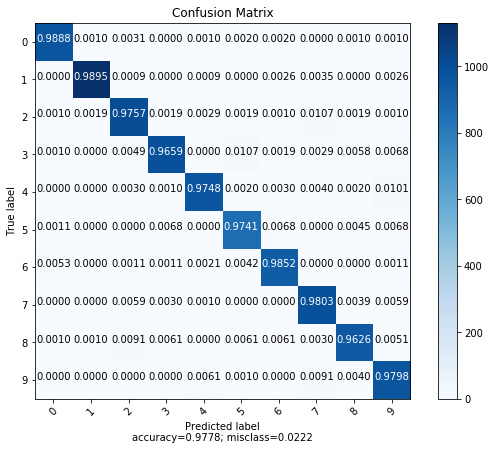

In [19]:
plot_confusion_matrix(conf_plot, 
                      normalize    = True,
                      target_names = ['0','1','2','3','4','5','6','7','8','9'],
                      title        = "Confusion Matrix")